In [1]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as mse





In [2]:
hdfc = pd.read_excel("/Users/medhanshgoyal/Desktop/Medhansh/Numerical_Scientists/HDFCBANK.NS.xlsx",usecols=['Date', 'Close'], parse_dates=['Date'],index_col='Date')
#Importing the data set. Since we only require the dates and the columns of close price for our problem, we select those

In [3]:
hdfc.head() # To test our dataset if it's working. The head function displays the column

,Close
Date,
2019-11-11,1264.750000
2019-11-13,1257.550049
2019-11-14,1273.900024
2019-11-15,1277.900024
2019-11-18,1262.050049


In [4]:
hdfc.shape # The dataset taken consists of 744 rows and 1 column

(744, 1)

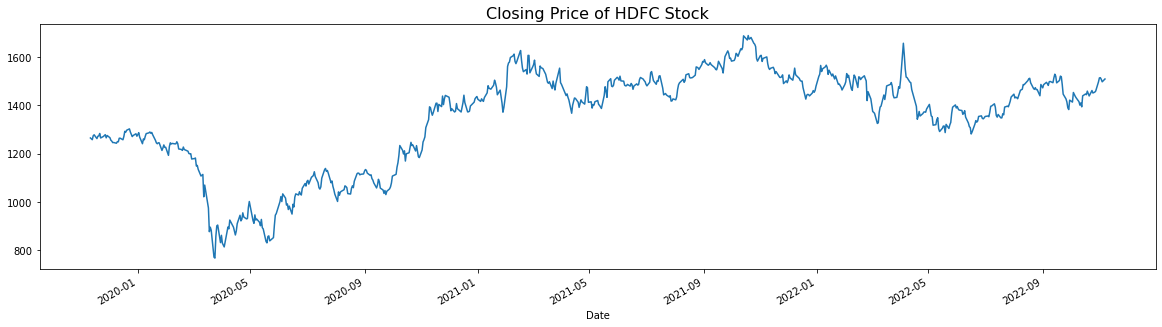

In [5]:
plt.figure(figsize=(20,5))
hdfc.Close.plot()
plt.title("Closing Price of HDFC Stock",fontsize=16)
plt.show()
#Plotting the closing price of HDFC

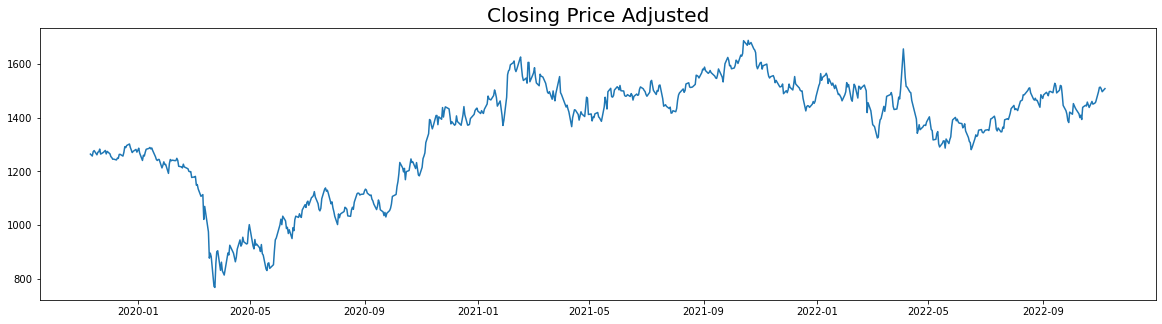

In [6]:
# The Split
plt.figure(figsize=(20,5))
stock_price = pd.concat([hdfc.Close[:'2019-11-11'],hdfc.Close['2015-11-19':]]) # adjustment required for our numerical methods
plt.plot(stock_price)
plt.title("Closing Price Adjusted",fontsize=20)
plt.show()

In [7]:
#helper function to plot the stock prediction
train_values = stock_price.iloc[:400] #training the 
test_values = stock_price.iloc[400:] #test

def plot_prediction(predicted,title):
    plt.figure(figsize=(20,5))
    plt.plot(train_values,label='Train')
    plt.plot(test_values,label='Actual')
    plt.plot(predicted,label='Predicted')
    plt.ylabel("Stock Prices of HDFC")
    plt.title(title,fontsize=15)
    plt.legend()
    plt.show()

In [8]:
#Average of previous values
print(train_values.mean())
sp_average = pd.Series(np.repeat(train_values.mean(),345),index=test_values.index)

1241.0823756575007


In [9]:
print("Mean Square Error: " ,mse(sp_average,test_values))
print("Root Mean Square Error: " ,np.sqrt(mse(sp_average,test_values)))

Mean Square Error:  61188.234320754644
Root Mean Square Error:  247.36255642427906


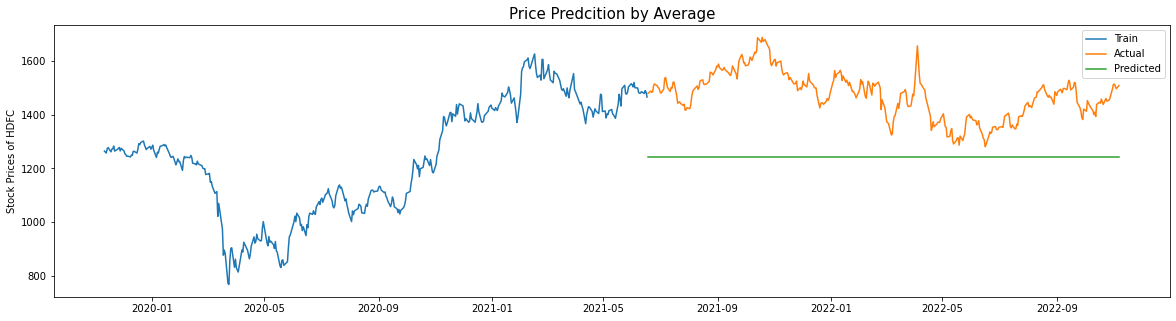

In [10]:
plot_prediction(sp_average,"Price Predcition by Average")

2. Weighted Mean
We shall give more weightage to the data which are close to the last day in training data, while calculating the mean. The last day in the training set will get a weightage of 1(=400/400) and the first day will get a weightage of 1/400.

In [11]:
weight = np.array(range(0,400))/400
weighted_train_data =np.multiply(train_values,weight)

# weighted average is the sum of this weighted train data by the sum of the weight

weighted_average = sum(weighted_train_data)/sum(weight)
print(weighted_average)
sp_wa = pd.Series(np.repeat(weighted_average,345),index=test_values.index)

print("Mean Square Error: " ,mse(sp_wa,test_values))
print("Root Mean Square Error: " ,np.sqrt(mse(sp_wa,test_values)))

1316.960521987093
Mean Square Error:  31719.91098239353
Root Mean Square Error:  178.10084497944845


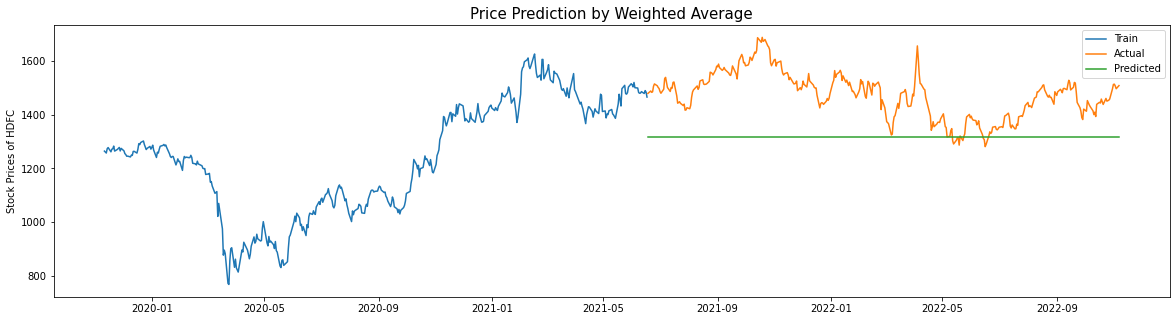

In [12]:
plot_prediction(sp_wa,"Price Prediction by Weighted Average")

In [13]:
train_values = stock_price[0:400]
test_values = stock_price[400:]


In [14]:
SP_train = pd.DataFrame([list(stock_price[i:i+80]) for i in range(400)],columns=range(80,0,-1),index=train_values.index)
SP_test = pd.DataFrame([list(stock_price[i:i+80]) for i in range(321,666)],index=test_values.index)
SP_test

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-18,1539.099976,1548.000000,1529.150024,1606.449951,1606.400024,1534.400024,1558.900024,1568.199951,1586.849976,1552.050049,...,1499.849976,1483.050049,1480.300049,1481.050049,1486.349976,1479.449951,1490.250000,1484.599976,1466.099976,1479.800049
2021-06-21,1548.000000,1529.150024,1606.449951,1606.400024,1534.400024,1558.900024,1568.199951,1586.849976,1552.050049,1530.000000,...,1483.050049,1480.300049,1481.050049,1486.349976,1479.449951,1490.250000,1484.599976,1466.099976,1479.800049,1488.699951
2021-06-22,1529.150024,1606.449951,1606.400024,1534.400024,1558.900024,1568.199951,1586.849976,1552.050049,1530.000000,1519.500000,...,1480.300049,1481.050049,1486.349976,1479.449951,1490.250000,1484.599976,1466.099976,1479.800049,1488.699951,1483.800049
2021-06-23,1606.449951,1606.400024,1534.400024,1558.900024,1568.199951,1586.849976,1552.050049,1530.000000,1519.500000,1562.500000,...,1481.050049,1486.349976,1479.449951,1490.250000,1484.599976,1466.099976,1479.800049,1488.699951,1483.800049,1485.500000
2021-06-24,1606.400024,1534.400024,1558.900024,1568.199951,1586.849976,1552.050049,1530.000000,1519.500000,1562.500000,1555.750000,...,1486.349976,1479.449951,1490.250000,1484.599976,1466.099976,1479.800049,1488.699951,1483.800049,1485.500000,1506.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,1371.250000,1395.800049,1397.099976,1406.150024,1391.800049,1357.849976,1351.050049,1362.050049,1347.550049,1348.050049,...,1443.849976,1458.650024,1448.800049,1438.599976,1461.050049,1450.900024,1454.400024,1458.699951,1496.699951,1513.250000
2022-11-02,1395.800049,1397.099976,1406.150024,1391.800049,1357.849976,1351.050049,1362.050049,1347.550049,1348.050049,1365.050049,...,1458.650024,1448.800049,1438.599976,1461.050049,1450.900024,1454.400024,1458.699951,1496.699951,1513.250000,1514.199951
2022-11-03,1397.099976,1406.150024,1391.800049,1357.849976,1351.050049,1362.050049,1347.550049,1348.050049,1365.050049,1360.750000,...,1448.800049,1438.599976,1461.050049,1450.900024,1454.400024,1458.699951,1496.699951,1513.250000,1514.199951,1507.550049


3. Moving Average
We have to predict the 345 values in data set and for each values we will get the average of previous 80 days.
This will be a simple mean of each column in the y_test.

In [15]:
sp_ma = SP_test.mean(axis=1)
print("Mean Square Error: " ,mse(sp_ma,test_values))
print("Root Mean Square Error: " ,np.sqrt(mse(sp_ma,test_values)))

Mean Square Error:  5310.447864834341
Root Mean Square Error:  72.87281979472415


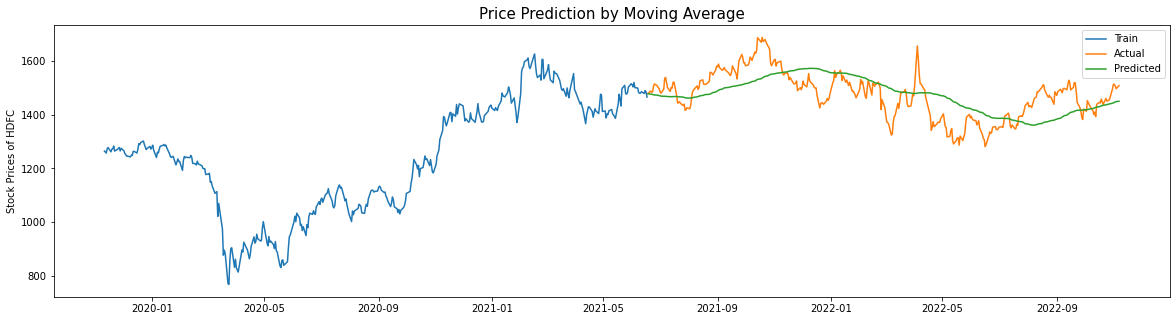

In [16]:
plot_prediction(sp_ma,"Price Prediction by Moving Average")

4. Linear regression
In this method, we will perform a linear regression on our dataset. The values will be predicted as a linear combination of the previous 400 days values.

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(SP_train,train_values) # Training the model
sp_lr = lr.predict(SP_test) # inference
sp_lr = pd.Series(sp_lr,index=test_values.index)
print("Mean Square Error: " ,mse(test_values,sp_lr))
print("Root Mean Square Error: " ,np.sqrt(mse(test_values,sp_lr)))

Mean Square Error:  13888.190761466518
Root Mean Square Error:  117.84816825672989


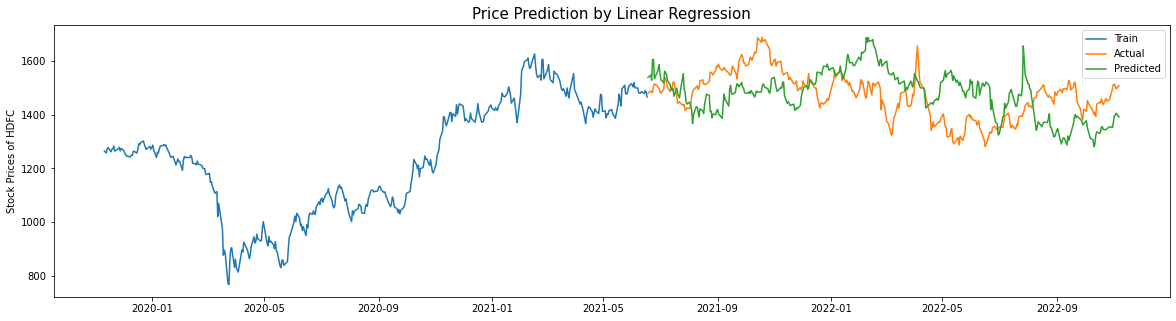

In [18]:
plot_prediction(sp_lr,"Price Prediction by Linear Regression")

6. Weighted Linear Regression
We will provide weightage to our input data rather than the features.

In [19]:


weight = np.array(range(1,401))/400
wlr = LinearRegression()


wlr.fit(SP_train,train_values,weight)
sp_wlr = wlr.predict(SP_test)
sp_wlr = pd.Series(sp_wlr,index=test_values.index)

print("Mean Square Error: " ,mse(test_values,sp_wlr))
print("Root Mean Square Error: " ,np.sqrt(mse(test_values,sp_wlr)))




Mean Square Error:  13888.19076146654
Root Mean Square Error:  117.84816825672998


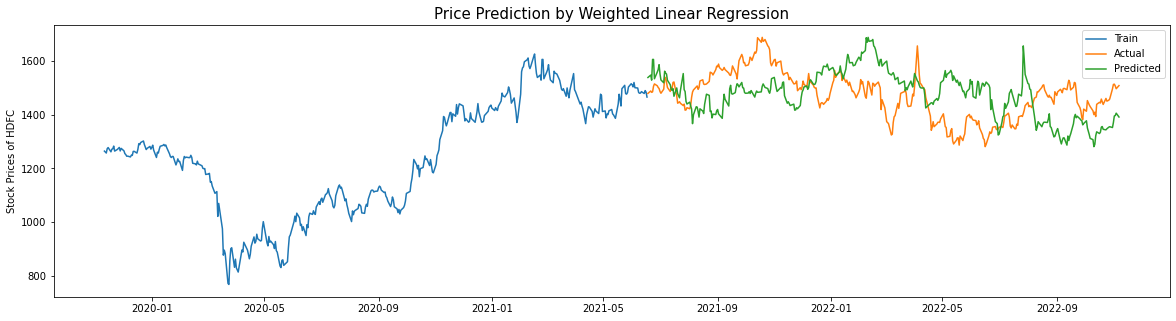

In [20]:
plot_prediction(sp_wlr,"Price Prediction by Weighted Linear Regression")

7. Lasso Regression
Linear Regression with L1 regulations.

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso()

las = lasso.fit(SP_train,train_values)
sp_lasso = lasso.predict(SP_test)
sp_lasso = pd.Series(sp_lasso,index = test_values.index)
print("Mean Square Error: " ,mse(test_values,sp_lasso))
print("Root Mean Square Error: " ,np.sqrt(mse(test_values,sp_lasso)))


Mean Square Error:  13887.800536194654
Root Mean Square Error:  117.84651261787366


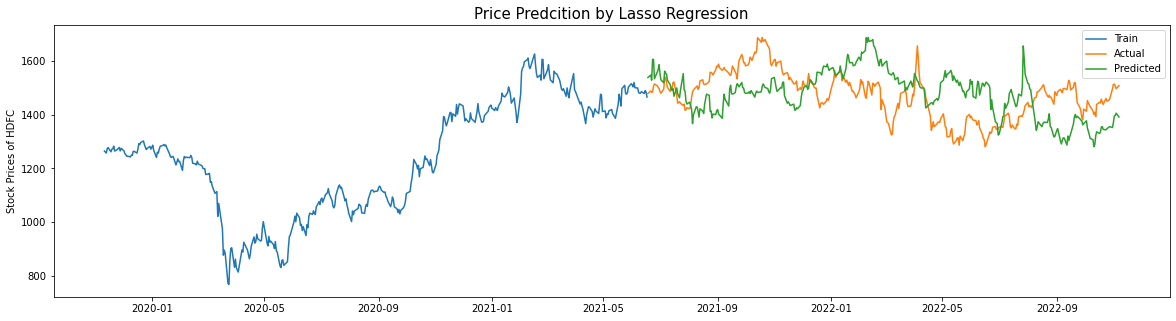

In [22]:
plot_prediction(sp_lasso,"Price Prediction by Lasso Regression")